# Подготовка данных к анализу

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [124]:
df = pd.read_csv("dirty_cafe_sales.csv")

### Ознакомимися с датасетом

In [126]:
df.head(25)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


### Заменим значения "UNKNOWN" и "ERROR" на NaN

In [128]:
#Replace error and unknown with NaN
df.replace(['UNKNOWN', 'ERROR'], np.nan, inplace=True)

In [130]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [132]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

Transaction ID - 0%
Item - 10%
Quantity - 5%
Price Per Unit - 5%
Total Spent - 5%
Payment Method - 32%
Location - 40%
Transaction Date - 5%


In [134]:
df.shape

(10000, 8)

### Видим, что всех численных столбцах маленькая доля пустых значений. Отбросим строки с пустыми значениями товара и даты

In [136]:
#Fill in NaN values everywhere but Location and Payment Method and drop NaN dates
df2 = df.dropna(subset=['Item', 'Transaction Date'])


In [138]:
df2.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

### Заполним пустые значения средними по столбцу для численных переменных.

In [140]:
columns_to_convert = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in columns_to_convert:
    df2[col] = pd.to_numeric(df[col], errors='coerce')

/tmp/ipykernel_245/3256221636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = pd.to_numeric(df[col], errors='coerce')


In [142]:
from sklearn.impute import SimpleImputer

quantity_mean = df2['Quantity'].mean()
price_mean = df2['Price Per Unit'].mean()
spent_mean = df2['Total Spent'].mean()

# Impute missing values in the 'age' column with the mean
df2['Quantity'].fillna(quantity_mean, inplace=True)
df2['Price Per Unit'].fillna(price_mean, inplace=True)
df2['Total Spent'].fillna(spent_mean, inplace=True)

/tmp/ipykernel_245/1440159636.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quantity'].fillna(quantity_mean, inplace=True)
/tmp/ipykernel_245/1440159636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price Per Unit'].fillna(price_mean, inplace=True)
/tmp/ipykernel_245/1440159636.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total Spent'].fillna(spent_mean, inplace=True)


In [143]:
for col in df2.columns:
    percent_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

Transaction ID - 0%
Item - 0%
Quantity - 0%
Price Per Unit - 0%
Total Spent - 0%
Payment Method - 32%
Location - 40%
Transaction Date - 0%


### Видим, что доля пустых значений в столбцах Payment method и Location слишком большая, рассмотрим их подробнее

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Location', ylabel='Count'>

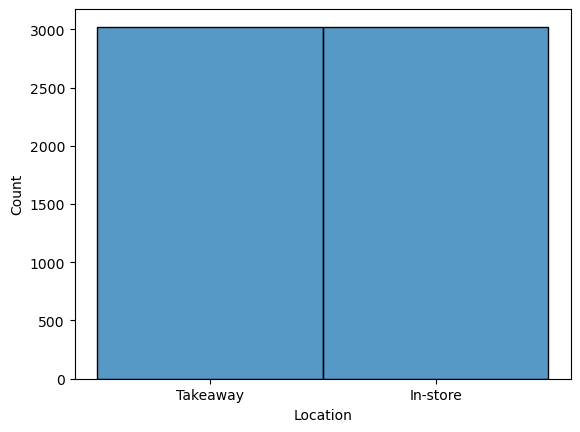

In [145]:
sns.histplot(df['Location'])

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Payment Method', ylabel='Count'>

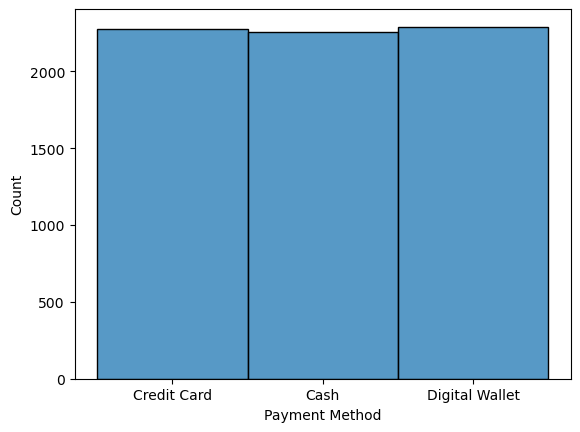

In [147]:
sns.histplot(df['Payment Method'])

In [148]:
#Проверим наличие дубликатов
df2[df2.duplicated() == True]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


### Видим, что в обоих столбцах 2-3 уникальных значения, которые распределены равномерно. Заполним их с соответествующим распределением. 

In [168]:
nan_count_A = df2['Location'].isna().sum()
values_A = ['Takeaway', 'In-store']
fill_values_A = np.resize(values_A, nan_count_A)
df2.loc[df2['Location'].isna(), 'Location'] = fill_values_A

nan_count_B = df2['Payment Method'].isna().sum()
values_B = ['Credit Card', 'Cash', 'Digital Wallet']
fill_values_B = np.resize(values_B, nan_count_B)
df2.loc[df2['Payment Method'].isna(), 'Payment Method'] = fill_values_B

In [171]:
for col in df2.columns:
    percent_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

Transaction ID - 0%
Item - 0%
Quantity - 0%
Price Per Unit - 0%
Total Spent - 0%
Payment Method - 0%
Location - 0%
Transaction Date - 0%


In [173]:
df2.shape

(8613, 8)

In [175]:
df2.head(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.000000,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.000000,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.925177,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.000000,Credit Card,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.000000,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.000000,Credit Card,In-store,2023-03-31
7,TXN_6699534,Sandwich,4.0,4.0,16.000000,Cash,Takeaway,2023-10-28
9,TXN_2064365,Sandwich,5.0,4.0,20.000000,Cash,In-store,2023-12-31
10,TXN_2548360,Salad,5.0,5.0,25.000000,Cash,Takeaway,2023-11-07
12,TXN_7619095,Sandwich,2.0,4.0,8.000000,Cash,In-store,2023-05-03


### Датасет подготовлен к анализу, большая часть строк сохранена, пустые значения исключены. 